## Задача 1.1.  Прямоугольный импульс в дискретной форме.  

С помощью моделирования  вычислите и постройте график для модуля и фазы ДВПФ  $X_N(\nu)$  последовательности из $N$ последовательных единичных импульсов ${{x}_{N}}[k]=\sum\limits_{m=0}^{N-1}{\mathbf{1}}\left[ k-m \right]$ для $\nu \in [-0,5; \;0,5]$.  Сравните результат с аналитической записью для  $X_N(\nu)$ (задача 1.б из задания к допуску).  Заполнить таблицу, используя результаты моделирования и аналитические записи. Принять частоту дискретизации равной 1 Гц. 

In [70]:
import numpy as np
import matplotlib.pyplot as plt


In [71]:
N = 6
L = 4
nu_0 = 0.1

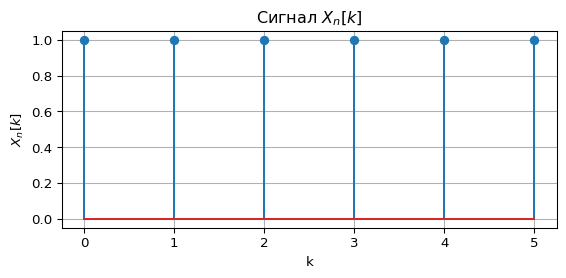

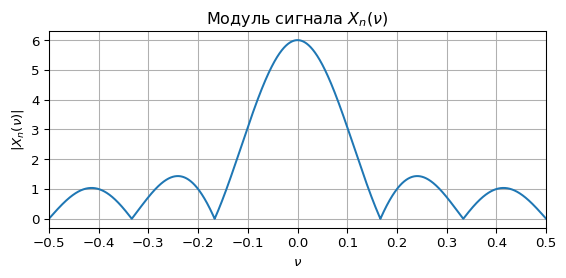

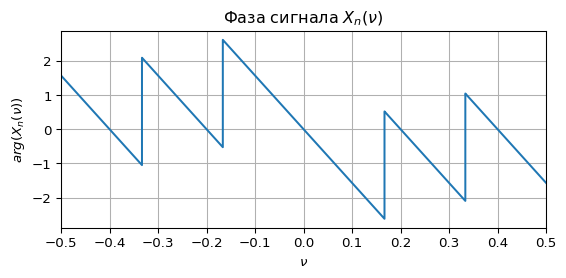

In [72]:
nu = 0.5
def dft(x_k, nu):
    X_nu = 0
    for k in range(len(x_k)):
        X_nu += x_k[k] * np.exp(-1j*2*np.pi*nu*k)
    
    return X_nu

vdft = np.vectorize(dft)

x_k = np.ones(N)
plt.figure(figsize=[6, 3], dpi=96)
plt.stem(range(N), x_k)
plt.grid()
plt.title('Сигнал $X_n[k]$')
plt.xlabel("k")
plt.ylabel("$X_n[k]$")
plt.tight_layout()


plt.figure(figsize=[6, 3], dpi=96)
X_nu = np.linspace(-nu, nu, int(1e5), dtype=complex)
for i in range(len(X_nu)):
    X_nu[i] = dft(x_k, X_nu[i])

plt.plot(np.linspace(-nu, nu, int(1e5)), np.abs(X_nu))
plt.grid()
plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.xlim([-0.5, 0.5])
plt.title('Модуль сигнала $X_n(\\nu)$')
plt.xlabel("$\\nu$")
plt.ylabel("$|X_n(\\nu)|$")
plt.tight_layout()

plt.figure(figsize=[6, 3], dpi=96)
plt.plot(np.linspace(-nu, nu, int(1e5)), np.angle(X_nu))
plt.grid()
plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.xlim([-0.5, 0.5])
plt.title('Фаза сигнала $X_n(\\nu)$')
plt.xlabel("$\\nu$")
plt.ylabel("$arg(X_n(\\nu))$")
plt.tight_layout()


## Задача 1.2.  Свойство масштабирования. 

Постройте последовательность ${{x}_{L}}[k]=\sum\limits_{m=-\infty }^{\infty }{{{x}_{N}}}[m]\mathbf{1}[k-mL]$, добавив $L-1$ нулевой отсчет между каждой парой соседних отсчетов сигнала ${{x}_{N}}[k]$ (из задачи 1.1). С помощью моделирования постройте модуль ее ДВПФ для $\nu \in [-0,5; \;0,5]$.

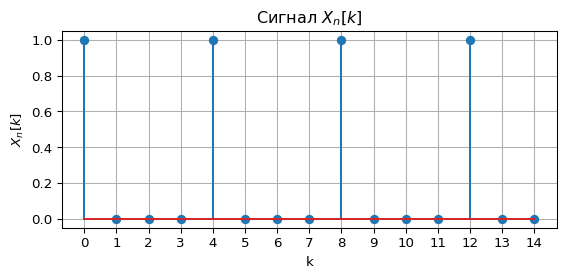

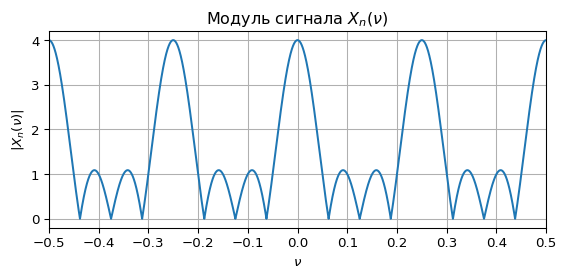

In [73]:
x_k = np.zeros((N - 1) * (L - 1))
for i in range(len(x_k)):
    if i % (L) == 0:
        x_k[i] = 1

plt.figure(figsize=[6, 3], dpi=96)
plt.stem(range(len(x_k)), x_k)
plt.xticks(np.arange(0, len(x_k), 1))
plt.grid()
plt.title('Сигнал $X_n[k]$')
plt.xlabel("k")
plt.ylabel("$X_n[k]$")
plt.tight_layout()

plt.figure(figsize=[6, 3], dpi=96)
X_nu = np.linspace(-nu, nu, int(1e5), dtype=complex)
for i in range(len(X_nu)):
    X_nu[i] = dft(x_k, X_nu[i])
plt.plot(np.linspace(-nu, nu, int(1e5)), np.abs(X_nu))
plt.grid()
plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.xlim([-0.5, 0.5])
plt.title('Модуль сигнала $X_n(\\nu)$')
plt.xlabel("$\\nu$")
plt.ylabel("$|X_n(\\nu)|$")
plt.tight_layout()

## Задача 1.3.  Дифференцирование спектральной плотности.
Рассмотрите последовательность ${{x}_{D}}[k]=k\,{{x}_{N}}[k]$.  Постройте с помощью моделирования график для модуля ДВПФ этой последовательности ${{X}_{D}}(\nu )$ для $\nu \in [-0,5; \;0,5]$. 


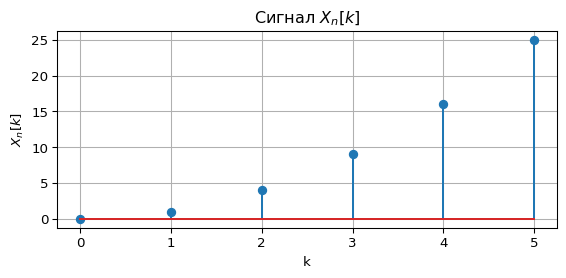

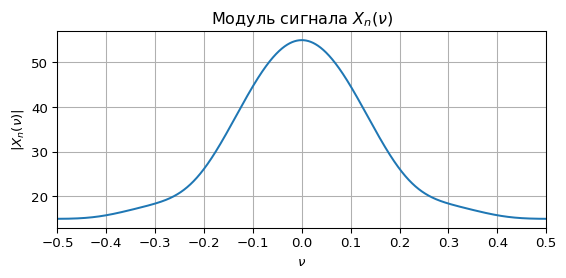

In [74]:
x_k = np.ones(N)
for i in range(len(x_k)):
    x_k[i] *= i ** 2

plt.figure(figsize=[6, 3], dpi=96)
plt.stem(range(len(x_k)), x_k)
plt.xticks(np.arange(0, len(x_k), 1))
plt.grid()
plt.title('Сигнал $X_n[k]$')
plt.xlabel("k")
plt.ylabel("$X_n[k]$")
plt.tight_layout()


plt.figure(figsize=[6, 3], dpi=96)
X_nu = np.linspace(-nu, nu, int(1e5), dtype=complex)
for i in range(len(X_nu)):
    X_nu[i] = dft(x_k, X_nu[i])
plt.plot(np.linspace(-nu, nu, int(1e5)), np.abs(X_nu))
plt.grid()
plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.xlim([-0.5, 0.5])
plt.title('Модуль сигнала $X_n(\\nu)$')
plt.xlabel("$\\nu$")
plt.ylabel("$|X_n(\\nu)|$")
plt.tight_layout()

## Задача 1.4. Теорема смещения.
С помощью моделирования получите график модуля спектральной плотности ${{X}_{S}}(\nu )$ для сигнала ${{x}_{S}}[k]={{x}_{N}}[k]\exp (j2\pi {{\nu }_{0}}k)$. 

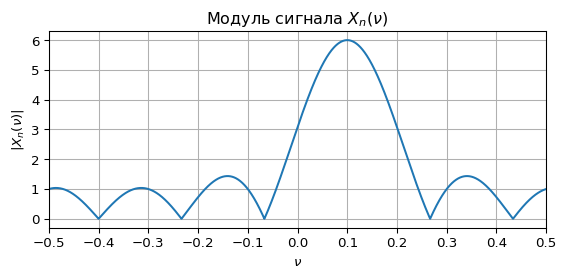

In [75]:
x_k = np.ones(N, dtype=complex)
for i in range(len(x_k)):
    x_k[i] *= np.exp(1j*2*np.pi*nu_0*i)


plt.figure(figsize=[6, 3], dpi=96)
X_nu = np.linspace(-nu, nu, int(1e5), dtype=complex)
for i in range(len(X_nu)):
    X_nu[i] = dft(x_k, X_nu[i])
plt.plot(np.linspace(-nu, nu, int(1e5)), np.abs(X_nu))
plt.grid()
plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.xlim([-0.5, 0.5])
plt.title('Модуль сигнала $X_n(\\nu)$')
plt.xlabel("$\\nu$")
plt.ylabel("$|X_n(\\nu)|$")
plt.tight_layout()

## Задача 1.5. Теорема о свертке во временной области. 

Вычислите с помощью моделирования линейную дискретную свертку последовательности ${{x}_{N}}[k]=\sum\limits_{m=0}^{N-1}{\mathbf{1}}\left[ k-m \right]$ с точно такой же последовательностью. Постройте график для модуля ДВПФ  этой последовательности. Воспользовавшись теоремой о свертке, получите аналитическую запись ДВПФ. Заполните таблицу.

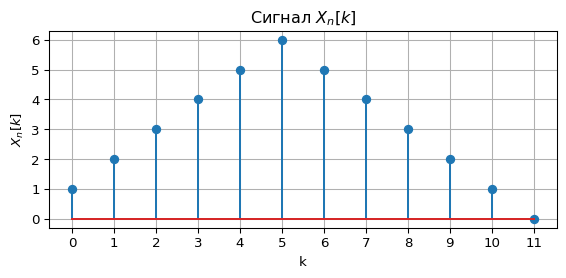

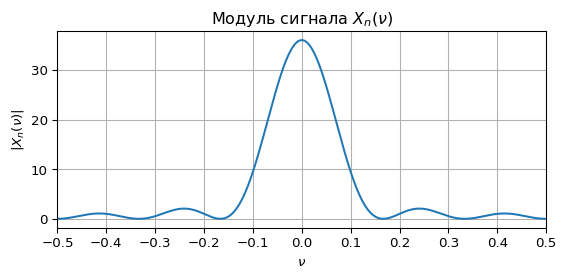

In [76]:
x_k = np.zeros(2 * N)
for i in range(2 * N):
    for j in range(2 * N):
        if (j >= 0 and i - j >= 0 and j < N and i - j < N):
            x_k[i] += 1

plt.figure(figsize=[6, 3], dpi=96)
plt.stem(range(len(x_k)), x_k)
plt.xticks(np.arange(0, len(x_k), 1))
plt.grid()
plt.title('Сигнал $X_n[k]$')
plt.xlabel("k")
plt.ylabel("$X_n[k]$")
plt.tight_layout()

plt.figure(figsize=[6, 3], dpi=96)
X_nu = np.linspace(-nu, nu, int(1e5), dtype=complex)
for i in range(len(X_nu)):
    X_nu[i] = dft(x_k, X_nu[i])
plt.plot(np.linspace(-nu, nu, int(1e5)), np.abs(X_nu))
plt.grid()
plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.xlim([-0.5, 0.5])
plt.title('Модуль сигнала $X_n(\\nu)$')
plt.xlabel("$\\nu$")
plt.ylabel("$|X_n(\\nu)|$")
plt.tight_layout()


## Задача 2.1. Алгоритмы вычисления ДПФ. 

Вычислите ДПФ $X[n]$ для последовательности $x[k]$ (в соответствии с Вашим вариантом). Воспользуйтесь следующими способами:

а) вычисление с использованием матричной формы ДПФ;

б) алгоритм быстрого преобразование Фурье (БПФ).

Сравните результаты. 


In [77]:
from scipy.linalg import dft as sldft
x_k = np.array([5, 3, 2, 0, 6, -7, 4, -6])
N = len(x_k)
m = -1

Сначала воспользуемся матричной формой ДПФ для вычисления

In [78]:
W = sldft(N)
X_n = np.array(W).dot(x_k)
X_n 

array([ 7.        +0.00000000e+00j,  1.82842712-9.31370850e+00j,
        5.        -2.00000000e+00j, -3.82842712-1.33137085e+01j,
       27.        +1.54305497e-14j, -3.82842712+1.33137085e+01j,
        5.        +2.00000000e+00j,  1.82842712+9.31370850e+00j])

Теперь проведем вычисление ДПФ по алгоритму быстрого преобразования Фурье (БПФ)

In [79]:
X_n = np.fft.fft(x_k)
X_n

array([ 7.         +0.j       ,  1.82842712 -9.3137085j,
        5.         -2.j       , -3.82842712-13.3137085j,
       27.         +0.j       , -3.82842712+13.3137085j,
        5.         +2.j       ,  1.82842712 +9.3137085j])

## Задача 2.2  Свойства симметрии ДПФ. 

Для последовательности $x[k]$ постройте графики $\text{Re}\ X[n]$, $\text{Im}\ X[n]$, $\left| X[n] \right|$, $\angle \ X[n]$.

Сравните получившиеся результаты со свойствами симметрии ДПФ. 

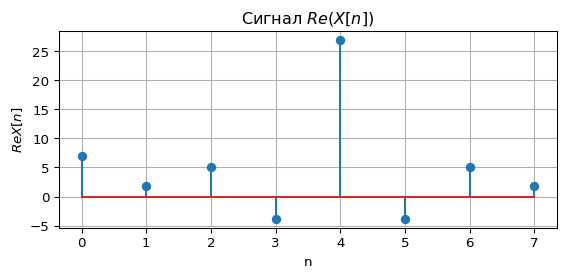

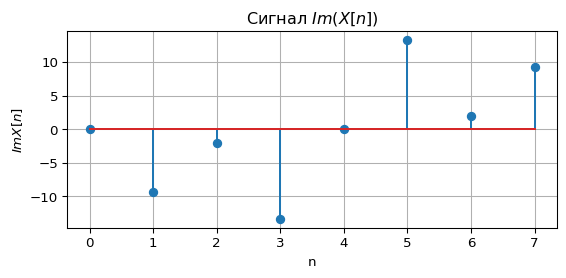

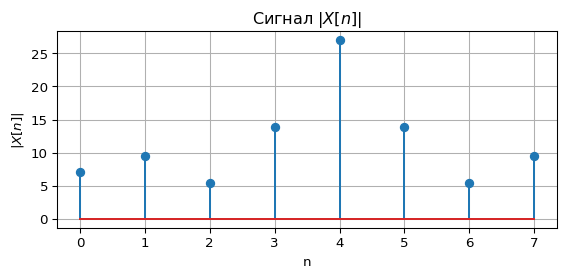

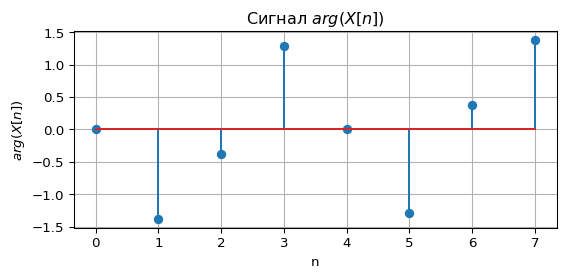

In [80]:
plt.figure(figsize=[6, 3], dpi=96)
plt.stem(range(len(X_n)), np.real(X_n))
plt.xticks(np.arange(0, len(X_n), 1))
plt.grid()
plt.title('Сигнал $Re(X[n])$')
plt.xlabel("n")
plt.ylabel("$ReX[n]$")
plt.tight_layout()

plt.figure(figsize=[6, 3], dpi=96)
plt.stem(range(len(X_n)), np.imag(X_n))
plt.xticks(np.arange(0, len(X_n), 1))
plt.grid()
plt.title('Сигнал $Im(X[n])$')
plt.xlabel("n")
plt.ylabel("$ImX[n]$")
plt.tight_layout()

plt.figure(figsize=[6, 3], dpi=96)
plt.stem(range(len(X_n)), np.abs(X_n))
plt.xticks(np.arange(0, len(X_n), 1))
plt.grid()
plt.title('Сигнал $|X[n]$|')
plt.xlabel("n")
plt.ylabel("$|X[n]|$")
plt.tight_layout()

plt.figure(figsize=[6, 3], dpi=96)
plt.stem(range(len(X_n)), np.arctan(X_n.imag / X_n.real))
plt.xticks(np.arange(0, len(X_n), 1))
plt.grid()
plt.title('Сигнал $arg(X[n])$')
plt.xlabel("n")
plt.ylabel("$arg(X[n])$")
plt.tight_layout()

## Задача 2.3.  Циклический сдвиг в ДПФ. 


Постройте график для последовательности $x[k]$.
Вычислите последовательность $y[k]$, ДПФ которой 
$Y[n]=\exp \left( -j\frac{2\pi }{8}mn \right)X[n].$

Сравните получившиеся последовательности. 

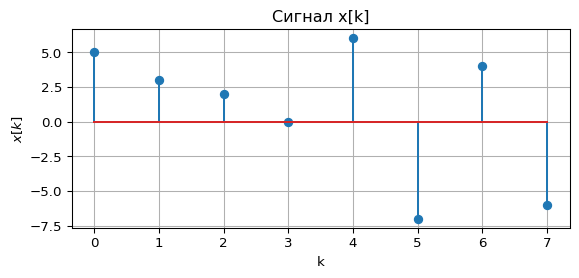

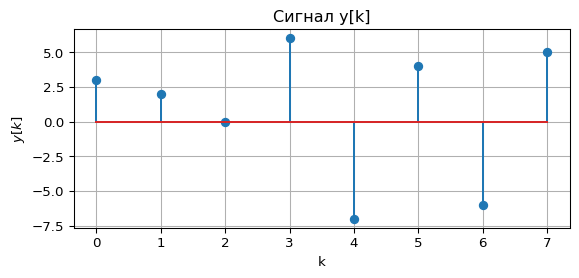

In [81]:
W = sldft(N)
W_inv = np.linalg.inv(W)

plt.figure(figsize=[6, 3], dpi=96)
plt.stem(range(len(x_k)), np.real(x_k))
plt.xticks(np.arange(0, len(x_k), 1))
plt.grid()
plt.title('Сигнал x[k]')
plt.xlabel("k")
plt.ylabel("$x[k]$")
plt.tight_layout()

Y_n = X_n
for i in range(len(Y_n)):
    Y_n[i] = np.exp(-1j * 2 * np.pi * m * i / 8) * X_n[i]

y_k = W_inv.dot(Y_n)
plt.figure(figsize=[6, 3], dpi=96)
plt.stem(range(len(y_k)), np.real(y_k))
plt.xticks(np.arange(0, len(y_k), 1))
plt.grid()
plt.title('Сигнал y[k]')
plt.xlabel("k")
plt.ylabel("$y[k]$")
plt.tight_layout()

## Задача 3.1. Интерполяция  ДВПФ добавлением нулевых отсчетов в сигнал.

Постройте на одном графике модули ДВПФ $\left| X(\nu ) \right|$ и ДПФ $\left| X[n] \right|$ последовательности ($N=32$)
$$x[k]=
   \sin \left( \dfrac{2\pi }{N}{{m}_{0}}k \right)+\sin \left( \dfrac{2\pi }{N}\left( {{m}_{0}}+0,25 \right)k \right),\ 0\le k\le N-1;  \\
   0,\ \ \text{при других }k.  \\$$
Увеличьте размерность ДПФ, добавив нулевые отсчеты так, чтобы все относительные частоты синусоид попадали на бины ДПФ.  Приведите на одном графике модули ДВПФ $\left| X(\nu ) \right|$ и ДПФ $\left| X[n] \right|$  для этого случая. Сравните результаты. 

In [82]:
N = 32
m_0 = 3
m_1 = -0.25

<class 'numpy.complex128'>
(4.000040000400004e-05+0j)


Text(0.5, 1.0, 'ДВПФ и ДПФ сигнала x[k]')

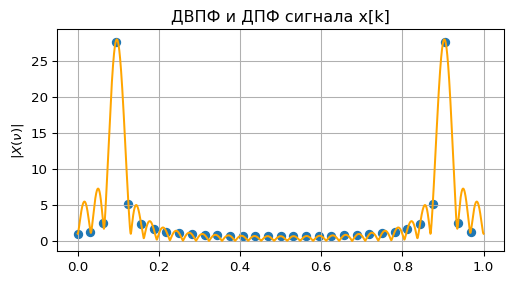

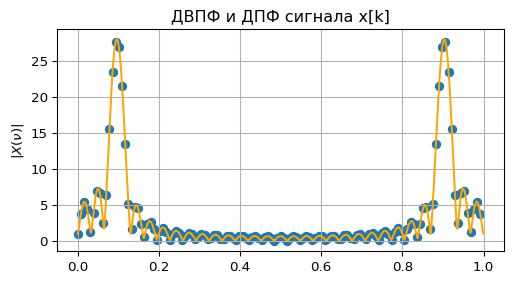

In [83]:
k = np.arange(N)
x_k = np.sin(2 * np.pi * m_0 * k / N) + np.sin(2 * np.pi * (m_0 + 0.25) * k / N)

X_DTFT_n = np.linspace(0, 2 * nu, int(1e5), dtype=complex)
print(type(X_DTFT_n[4]))
print(X_DTFT_n[4])
for i in range(len(X_DTFT_n)):
    X_DTFT_n[i] = dft(x_k, X_DTFT_n[i])

X_DFT_n = np.fft.fft(x_k)

plt.figure(figsize=[6, 3], dpi=96)
plt.plot(np.linspace(0, 2 * nu, int(1e5)), np.abs(X_DTFT_n), label='ДВПФ $|X(\\nu)|$', color='orange')
plt.scatter(np.array(range(len(X_DFT_n))) / N, np.abs(X_DFT_n), label='ДПФ $|X(\\nu)|$')
plt.grid()
# plt.xlim([-0.1, 0.1])
plt.ylabel("$|X(\\nu)|$")
plt.title('ДВПФ и ДПФ сигнала x[k]')


x_k = np.zeros(4 * N)
for i in range(N):
    x_k[i] = np.sin(2 * np.pi * m_0 * i / N) + np.sin(2 * np.pi * (m_0 + 0.25) * i / N)

X_DTFT_n = np.linspace(0, 2 * nu, int(1e5), dtype=complex)
for i in range(len(X_DTFT_n)):
    X_DTFT_n[i] = dft(x_k, X_DTFT_n[i])

X_DFT_n = np.fft.fft(x_k)

plt.figure(figsize=[6, 3], dpi=96)
plt.plot(np.linspace(0, 2 * nu, int(1e5)), np.abs(X_DTFT_n), label='ДВПФ $|X(\\nu)|$', color='orange')
plt.scatter(np.array(range(len(X_DFT_n))) / (4 * N), np.abs(X_DFT_n), label='ДПФ $|X(\\nu)|$')
plt.grid()
# plt.xlim([-0.1, 0.1])
plt.ylabel("$|X(\\nu)|$")
plt.title('ДВПФ и ДПФ сигнала x[k]')

## Задача 3.2. ДВПФ и ДПФ периодической последовательности.
Посторойте графики для действительной и мнимой части коэффициентов ДПФ $\widetilde{X[n]}$ периодической последовательности $x[k] = cos(\frac{2*\pi}{N}mk) + sin(\frac{2*\pi}{N}mk)$ с периодом N = 32, для случаев $m = m_0$ и $m = m_0 + m_1$.

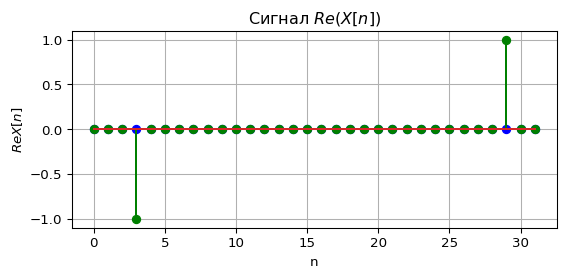

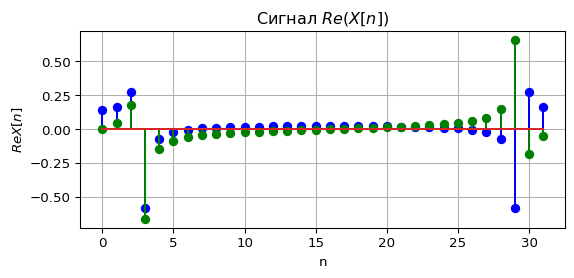

In [84]:
k = np.arange(N)
m = m_0
x_k = np.sin(2 * np.pi * m * k / N) + np.sin(2 * np.pi * m * k / N)
X_n = np.fft.fft(x_k) / N

plt.figure(figsize=[6, 3], dpi=96)
plt.stem(range(len(X_n)), np.real(X_n), 'b')
plt.stem(range(len(X_n)), np.imag(X_n), 'g')
plt.grid()
plt.title('Сигнал $Re(X[n])$')
plt.xlabel("n")
plt.ylabel("$ReX[n]$")
plt.tight_layout()

m = m_0 + m_1
x_k = np.sin(2 * np.pi * m * k / N) + np.sin(2 * np.pi * m * k / N)
X_n = np.fft.fft(x_k) / N

plt.figure(figsize=[6, 3], dpi=96)
plt.stem(range(len(X_n)), np.real(X_n), 'b')
plt.stem(range(len(X_n)), np.imag(X_n), 'g')
plt.grid()
plt.title('Сигнал $Re(X[n])$')
plt.xlabel("n")
plt.ylabel("$ReX[n]$")
plt.tight_layout()